# LA Bike Analysis Testing

# Content
1. Set up <br/>
    1.1 Import <br/>
    1.2 Peek at Columns<br/><br/>
2. Basic Analysis <br/>
2.1 Popular Stations <br/>
2.2 Average Distances <br/>
2.3 Quantify Riders <br/><br/>
3. Additonal Analysis <br/>
3.1 Ridership Changes by Season <br/>
3.2 Net Changes in Bikes  <br/>
3.3 Trip Route Category & Passholder Type Breakdown <br/><br/>
4. Notable Trends & Graphs <br/>
4.1 Power Users, Rides & Revenues <br/>
4.2 Disruptions <br/>
4.3 Bike Preferences <br/>

<h2> 1. Set up</h2>

<h3>1.1 Imports</h3>

<p> If you haven't already installed the pandas and folium modules yet, be sure to install them:</p>
<label>>>> pip install folium pandas</label>

In [134]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import re
from sklearn.preprocessing import normalize
import math

import folium  
from IPython.display import HTML, display

<h3>1.2 Peek at Columns</h3>

In [3]:
bikes = pd.read_csv('metro-bike-share-trip-data.csv', encoding='latin-1')
bikes.head()

/Users/franklinye/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Trip ID  Duration           Start Time             End Time  \
0  1912818       180  2016-07-07T04:17:00  2016-07-07T04:20:00   
1  1919661      1980  2016-07-07T06:00:00  2016-07-07T06:33:00   
2  1933383       300  2016-07-07T10:32:00  2016-07-07T10:37:00   
3  1944197     10860  2016-07-07T10:37:00  2016-07-07T13:38:00   
4  1940317       420  2016-07-07T12:51:00  2016-07-07T12:58:00   

   Starting Station ID  Starting Station Latitude  Starting Station Longitude  \
0               3014.0                  34.056610                  -118.23721   
1               3014.0                  34.056610                  -118.23721   
2               3016.0                  34.052898                  -118.24156   
3               3016.0                  34.052898                  -118.24156   
4               3032.0                  34.049889                  -118.25588   

   Ending Station ID  Ending Station Latitude  Ending Station Longitude  \
0             3014.0                34.056610                -118.23721   
1             3014.0                34.056610                -118.23721   
2             3016.0                34.052898                -118.24156   
3             3016.0                34.052898                -118.24156   
4             3032.0                34.049889                -118.25588   

   Bike ID  Plan Duration Trip Route Category Passholder Type  \
0   6281.0           30.0          Round Trip    Monthly Pass   
1   6281.0           30.0          Round Trip    Monthly Pass   
2   5861.0          365.0          Round Trip       Flex Pass   
3   5861.0          365.0          Round Trip       Flex Pass   
4   6674.0            0.0          Round Trip         Walk-up   

                                   Starting Lat-Long  \
0  {'longitude': '-118.23721', 'latitude': '34.05...   
1  {'longitude': '-118.23721', 'latitude': '34.05...   
2  {'longitude': '-118.24156', 'latitude': '34.05...   
3  {'longitude': '-118.24156', 'latitude': '34.05...   
4  {'longitude': '-118.25588', 'latitude': '34.04...   

                                     Ending Lat-Long  
0  {'longitude': '-118.23721', 'latitude': '34.05...  
1  {'longitude': '-118.23721', 'latitude': '34.05...  
2  {'longitude': '-118.24156', 'latitude': '34.05...  
3  {'longitude': '-118.24156', 'latitude': '34.05...  
4  {'longitude': '-118.25588', 'latitude': '34.04...

<p>Time Range the data spans:</p>

In [342]:
weakTimeSort = bikes['Start Time'].sort_values()
startDate, endDate = weakTimeSort[0], weakTimeSort[len(weakTimeSort.index) - 1]
startDate, endDate

('2016-07-07T04:17:00', '2017-03-31T23:45:00')

<h2>2. Basic Analysis</h2>

<h3>2.1 Popular Stations </h3>

<p> To identify the popularity of each station, we define popularity as each station's number of trips started and ended. We will eventaully look at trends between the Trips started and Ended at each station, but for now will focuse on the aggregate traffic accross the week from 2016-07-07 to 2017-03-31.</p>

<p> We start by looking at the raw amount of trip starts and ends each station made, as well as the differences between the two.</p>

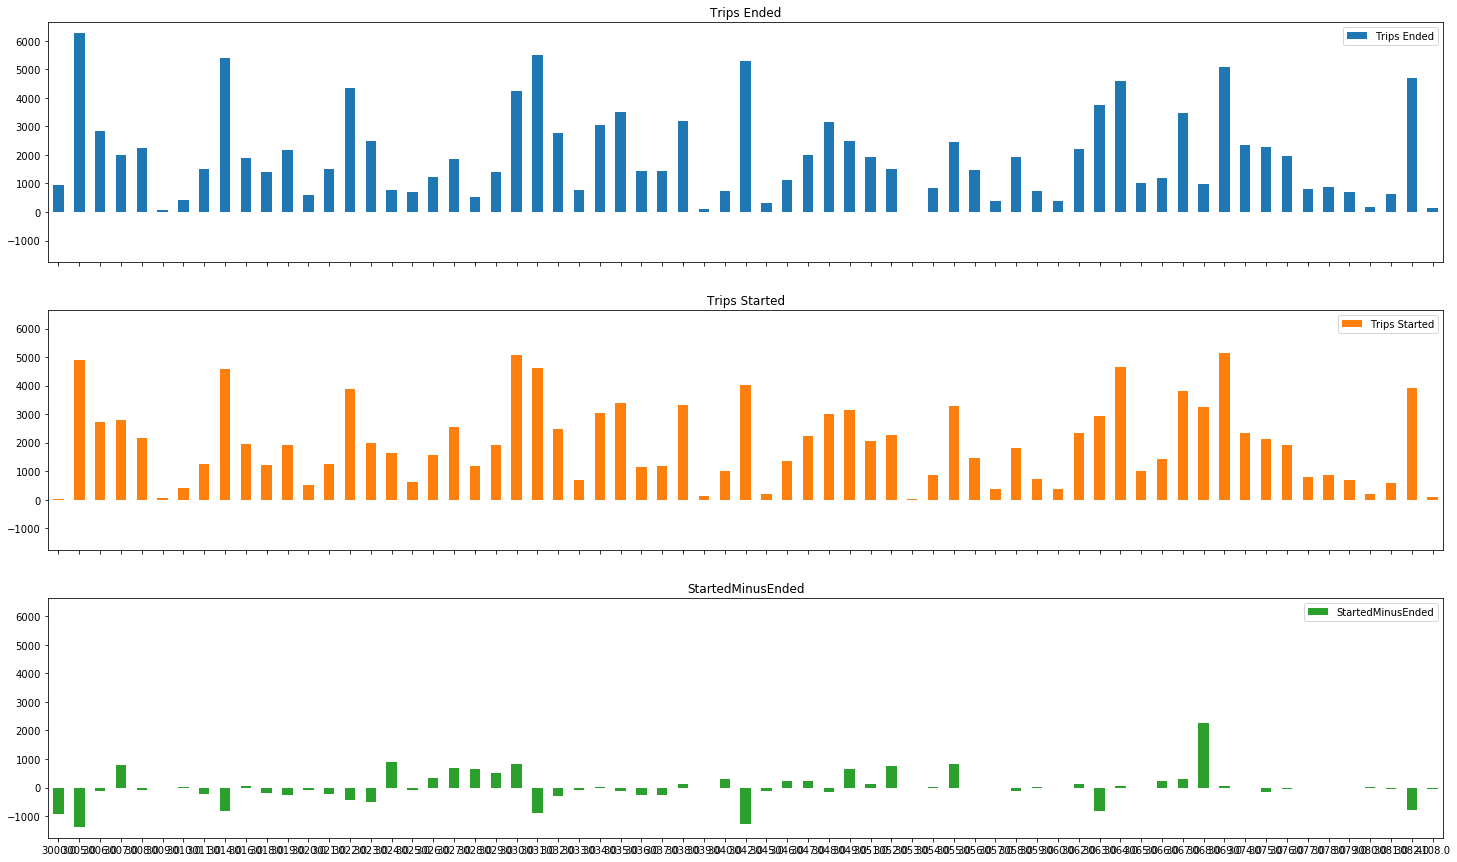

In [157]:
byEndStation = bikes.groupby(["Ending Station ID"])
byStartStation = bikes.groupby(["Starting Station ID"])

byStationCount = pd.DataFrame({"Trips Started": byStartStation.size(), "Trips Ended": byEndStation.size()})
byStationCount = byStationCount.assign(StartedMinusEnded=(byStationCount["Trips Started"] - byStationCount["Trips Ended"]))

byStationCountPlt = byStationCount.plot.bar(rot=0, subplots=True, figsize=(25, 15), sharey=True)
byStationCountPlt[1].legend(loc=1)
byStationCountPlt[1].set_xlabel("Bike Station ID")

<p>We can see that the vast majority of stations have inconsequential differences between the Trips Started and Ended, aside from one station that had almost 2000 more trip starts then ends. But our definition of traffic looks at the raw sum of trip starts and ends, so this difference merely suggests that there might exist an general flow in where bikes are more likely to collect. <br/>However, we don't know if external redistribution of bikes occured, so it is hard to say with our current information.</p>

<p>As to not throw the scales of the previous plots off, we plot the traffic, or the trip starts plus ends, separately. We also show the same plot, but sorted, so we may gleam the top 10 Station IDs with the most traffic</p>

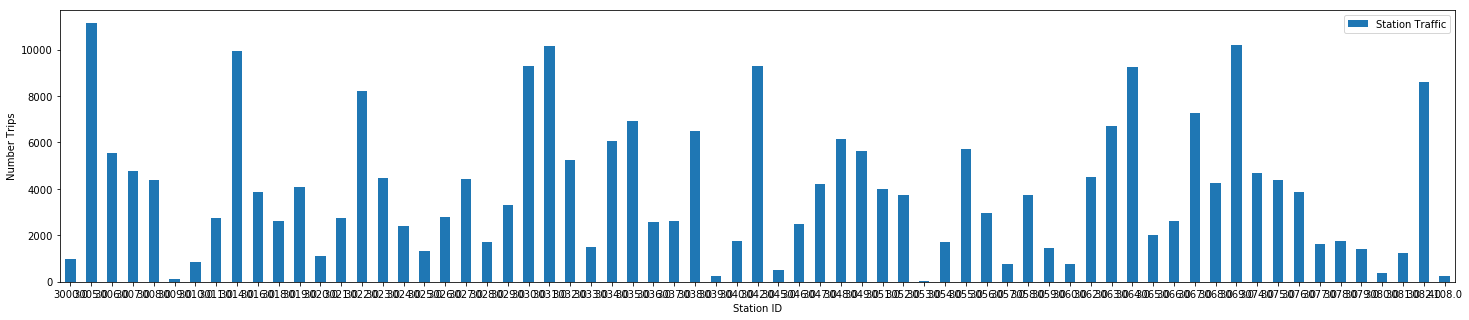

In [6]:
stationTraffic = pd.DataFrame({"Station Traffic": byStationCount["Trips Started"] + byStationCount["Trips Ended"]})
trafficPlot = stationTraffic.plot.bar(rot=0, figsize=(25, 5))
trafficPlot.set_ylabel("Number Trips")
trafficPlot.set_xlabel("Station ID")


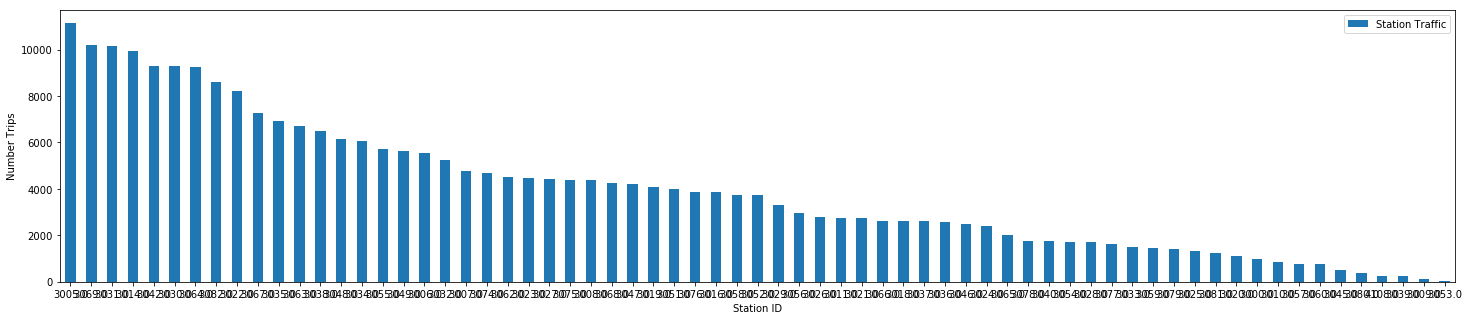

In [7]:
stationTrafficSorted = stationTraffic.sort_values(by=['Station Traffic'], ascending=False)
sortedTrafficPlot = stationTrafficSorted.plot.bar(rot=0, figsize=(25, 5))
sortedTrafficPlot.set_ylabel("Number Trips")
sortedTrafficPlot.set_xlabel("Station ID")

In [73]:
stationTrafficSorted.iloc[np.arange(10)]

Station Traffic
3005.0            11145
3069.0            10210
3031.0            10146
3014.0             9956
3042.0             9308
3030.0             9283
3064.0             9266
3082.0             8611
3022.0             8230
3067.0             7278

<p> The graph of the total traffic per station has apparent differences, and the distribution of traffic appears to be a rough linear relationship. This means there are moderate disparities in station traffic. If we are to find a significant difference in trips started and ended by specific times of the day, this could and suggest a potential recommendation for station expansion if the more popular bikes stations experience shortages or surpluses at given moments in the day</p>

<p>To get a better grasp on the geographic layout of the stations, we may plot the station's coordinates on a map of LA vs the top 10 stations. Clicking on each station reveals the station's aggregate traffic.</p>

In [152]:
LDN_COORDINATES = bikes[['Starting Station Latitude', 'Starting Station Longitude']].iloc[0]
def plotStationMap(number):
    def plotDot(index, value):
        stationMap.simple_marker(
            [bikes['Starting Station Latitude'].loc[index], bikes['Starting Station Longitude'].loc[index]], 
            popup=f"{value}")
    stationMap = folium.Map(location=(LDN_COORDINATES[0], LDN_COORDINATES[1]), zoom_start=13)
    stationsToUse = stationTrafficSorted.iloc[np.arange(number)]
    for index in stationsToUse.index:
        plotDot(index, stationTrafficSorted.loc[index][0])
    stationMap._build_map()
    srcdocStationMap = stationMap.HTML.replace('"', '&quot;')
    stationMapHTML = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
                 'border: none"></iframe>'.format(srcdocStationMap, 1000, 400))
    return stationMapHTML

In [153]:
plotStationMap(len(stationTrafficSorted.index))

In [299]:
plotStationMap(10)

<h2> 3. Additional Analysis </h2>

<h3> 3.2 Net Changes in Bikes Throughout the Day</h2>

<p> To look closer at the demand influx cabability needed for each hour, we create a pivot table that shows the supply and demand of bikes at each hour. We will interperate demand for bikes as trips started and supply and trips ended. Taking the difference between the supply and demand will then enable us to see the average increase/decrease in bikes at each station throughout the day. We will also isolate the changes by weekend and weekdays to determine any differences in the workweek.</p>

<p> First we must normalize the data so that we can measure the average flow of bikes for each station by the weekday hour.</p>

In [355]:
weeksPassed = (pd.Timestamp(endDate) - pd.Timestamp(startDate)).days / 7
weekdaysPassed = weeksPassed * 5
weekdaysPassed

190.71428571428572

In [360]:
def dateToHour(timeStamp):
    return pd.Timestamp(timeStamp).hour
def dateToWeekday(timeStamp):
    return pd.Timestamp(timeStamp).weekday()

hours = bikes[['Starting Station ID', 'Ending Station ID']].assign(StartHour=bikes['Start Time'].apply(dateToHour)).assign(EndHour=bikes['End Time'].apply(dateToHour)).assign(Weekday=bikes['End Time'].apply(dateToWeekday))
hoursWeekday = hours.loc[hours['Weekday'].isin(np.arange(5))]
stationByStartHour = hoursWeekday[['Starting Station ID','StartHour']].pivot_table(values='StartHour', index='Starting Station ID', columns='StartHour', fill_value=0, aggfunc=len)
stationByEndHour = hoursWeekday[['Ending Station ID','EndHour']].pivot_table(values='EndHour', index='Ending Station ID', columns='EndHour', fill_value=0, aggfunc=len)

stationDiffHour = stationByEndHour.sub(stationByStartHour, fill_value=0) * 100 / weekdaysPassed
# for col in stationDiffHour.columns:
#     stationDiffHour[col] = stationByEndHour[col] - stationByStartHour[col]
#     if col == 0:
#         print(stationByStartHour[col].head())
#         print(stationByEndHour[col].head())
#         print((stationByEndHour[col] - stationByStartHour[col]).head())


stationDiffHour.head()


EndHour                   0         1          2          3          4   \
Ending Station ID                                                         
3000.0              0.000000  0.000000   0.000000   0.000000   0.000000   
3005.0             -2.097378 -6.816479 -22.546816 -12.584270  11.011236   
3006.0              5.243446  8.389513  -2.621723   3.670412   1.573034   
3007.0              1.048689 -1.573034  -2.097378  -0.524345  -0.524345   
3008.0            -15.205993 -2.097378  -2.621723   2.621723  31.985019   

EndHour                   5          6           7           8           9   \
Ending Station ID                                                             
3000.0              0.524345   2.621723   21.498127   16.779026   14.157303   
3005.0             20.449438  -0.524345  219.700375  332.958801  243.820225   
3006.0             -3.146067   5.243446   -7.340824  -33.558052   -8.913858   
3007.0              8.389513   4.719101   14.681648    0.000000   59.775281   
3008.0              3.670412  35.655431   50.337079   18.352060   13.108614   

EndHour              ...             14         15         16         17  \
Ending Station ID    ...                                                   
3000.0               ...      24.644195  20.973783  24.644195  26.741573   
3005.0               ...      31.460674  22.022472  13.632959 -58.202247   
3006.0               ...     -16.254682   7.340824  22.022472  27.790262   
3007.0               ...     -26.217228 -28.838951 -24.119850 -61.348315   
3008.0               ...      14.681648   1.048689  -9.438202 -31.460674   

EndHour                   18          19         20         21         22  \
Ending Station ID                                                           
3000.0             28.314607   19.925094  20.449438  16.254682   0.000000   
3005.0            -79.176030 -143.146067 -52.434457 -14.681648 -14.681648   
3006.0             23.595506   24.644195  -1.573034 -28.838951  -2.097378   
3007.0            -76.554307  -51.910112 -62.921348 -36.704120  -7.865169   
3008.0             -5.767790   10.486891   9.438202  -4.719101 -27.790262   

EndHour                   23  
Ending Station ID             
3000.0              0.000000  
3005.0            -13.108614  
3006.0             12.584270  
3007.0             -5.243446  
3008.0            -11.535581  

[5 rows x 24 columns]

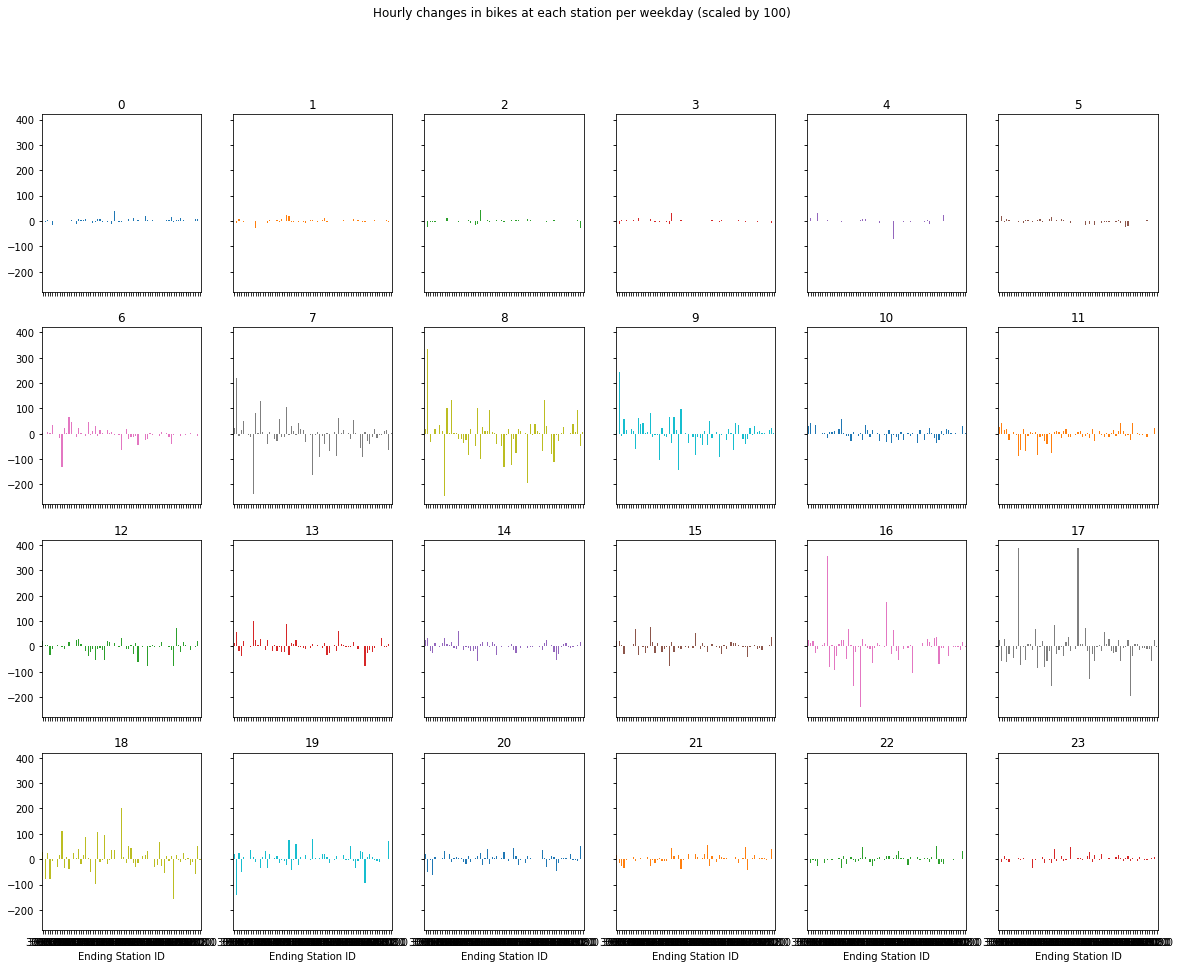

In [361]:
stationDiffHourPlt = stationDiffHour.plot.bar(rot=0,subplots=True,layout=(4, 6), 
                                        figsize=(20, 15), legend=False, sharey=True,
                                       title='Hourly changes in bikes at each station per weekday (scaled by 100)')


</p>Looking at the surges of bike usage above during the weekday, we can see that in the hours 7-9 AM and 4-6 PM there are mild changes of bikes getting dropped off and picked up in each station. Specifically we notice in the hour graphs of 16 & 17, where the largest jump in bikes for a station in an hour can be seen, the increase per hour is still capped at an average of a net 4 bikes per hour</p>